# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>💕💔 Heart Disease Prediction using Machine Learning </b></h1>
<hr>
​

The rising incidence of heart disease is a major public health concern, underscoring the importance of early detection and intervention. Accurately and efficiently diagnosing heart disease is a challenging task, as it involves numerous risk factors, such as cholesterol levels, smoking habits, obesity, family history, blood pressure, and working conditions.

Thankfully, advances in machine learning algorithms have made it possible to develop predictive models that can help healthcare professionals identify individuals at risk of heart disease. By using regression models or the KNN method, machine learning algorithms can analyze large datasets of patient information and generate accurate predictions.

Developing these models can have a significant impact on public health, potentially saving tens of thousands of lives in the future. Being a part of such a critical endeavor is a humbling and inspiring experience, as it highlights the immense potential of machine learning to improve human health and well-being.


<center>
    <img src="../HeartDiseasePrediction/images/heart.jpg" alt="heart image" />
</center>

## <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">The goal  </div>
This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.
Using machine learning to classify cardiovascular disease occurrence can help diagnosticians reduce misdiagnosis. This research develops a model that can correctly predict cardiovascular diseases to reduce the fatality caused by cardiovascular diseases.
## <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Importing Libraries 📚</div>


In [1]:
import warnings
warnings.filterwarnings('ignore') 
import math
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt 
# Preparing and Evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import os
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  roc_curve, roc_auc_score, auc
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, RocCurveDisplay
%matplotlib inline
sns.set_style('darkgrid')

### Step 1: Reading and Understanding the Data


1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> EDA 📉</div>

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
# statistical measures about the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.shape

(1025, 14)

In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Step 2: Visualizing the data
Check relation between features and target

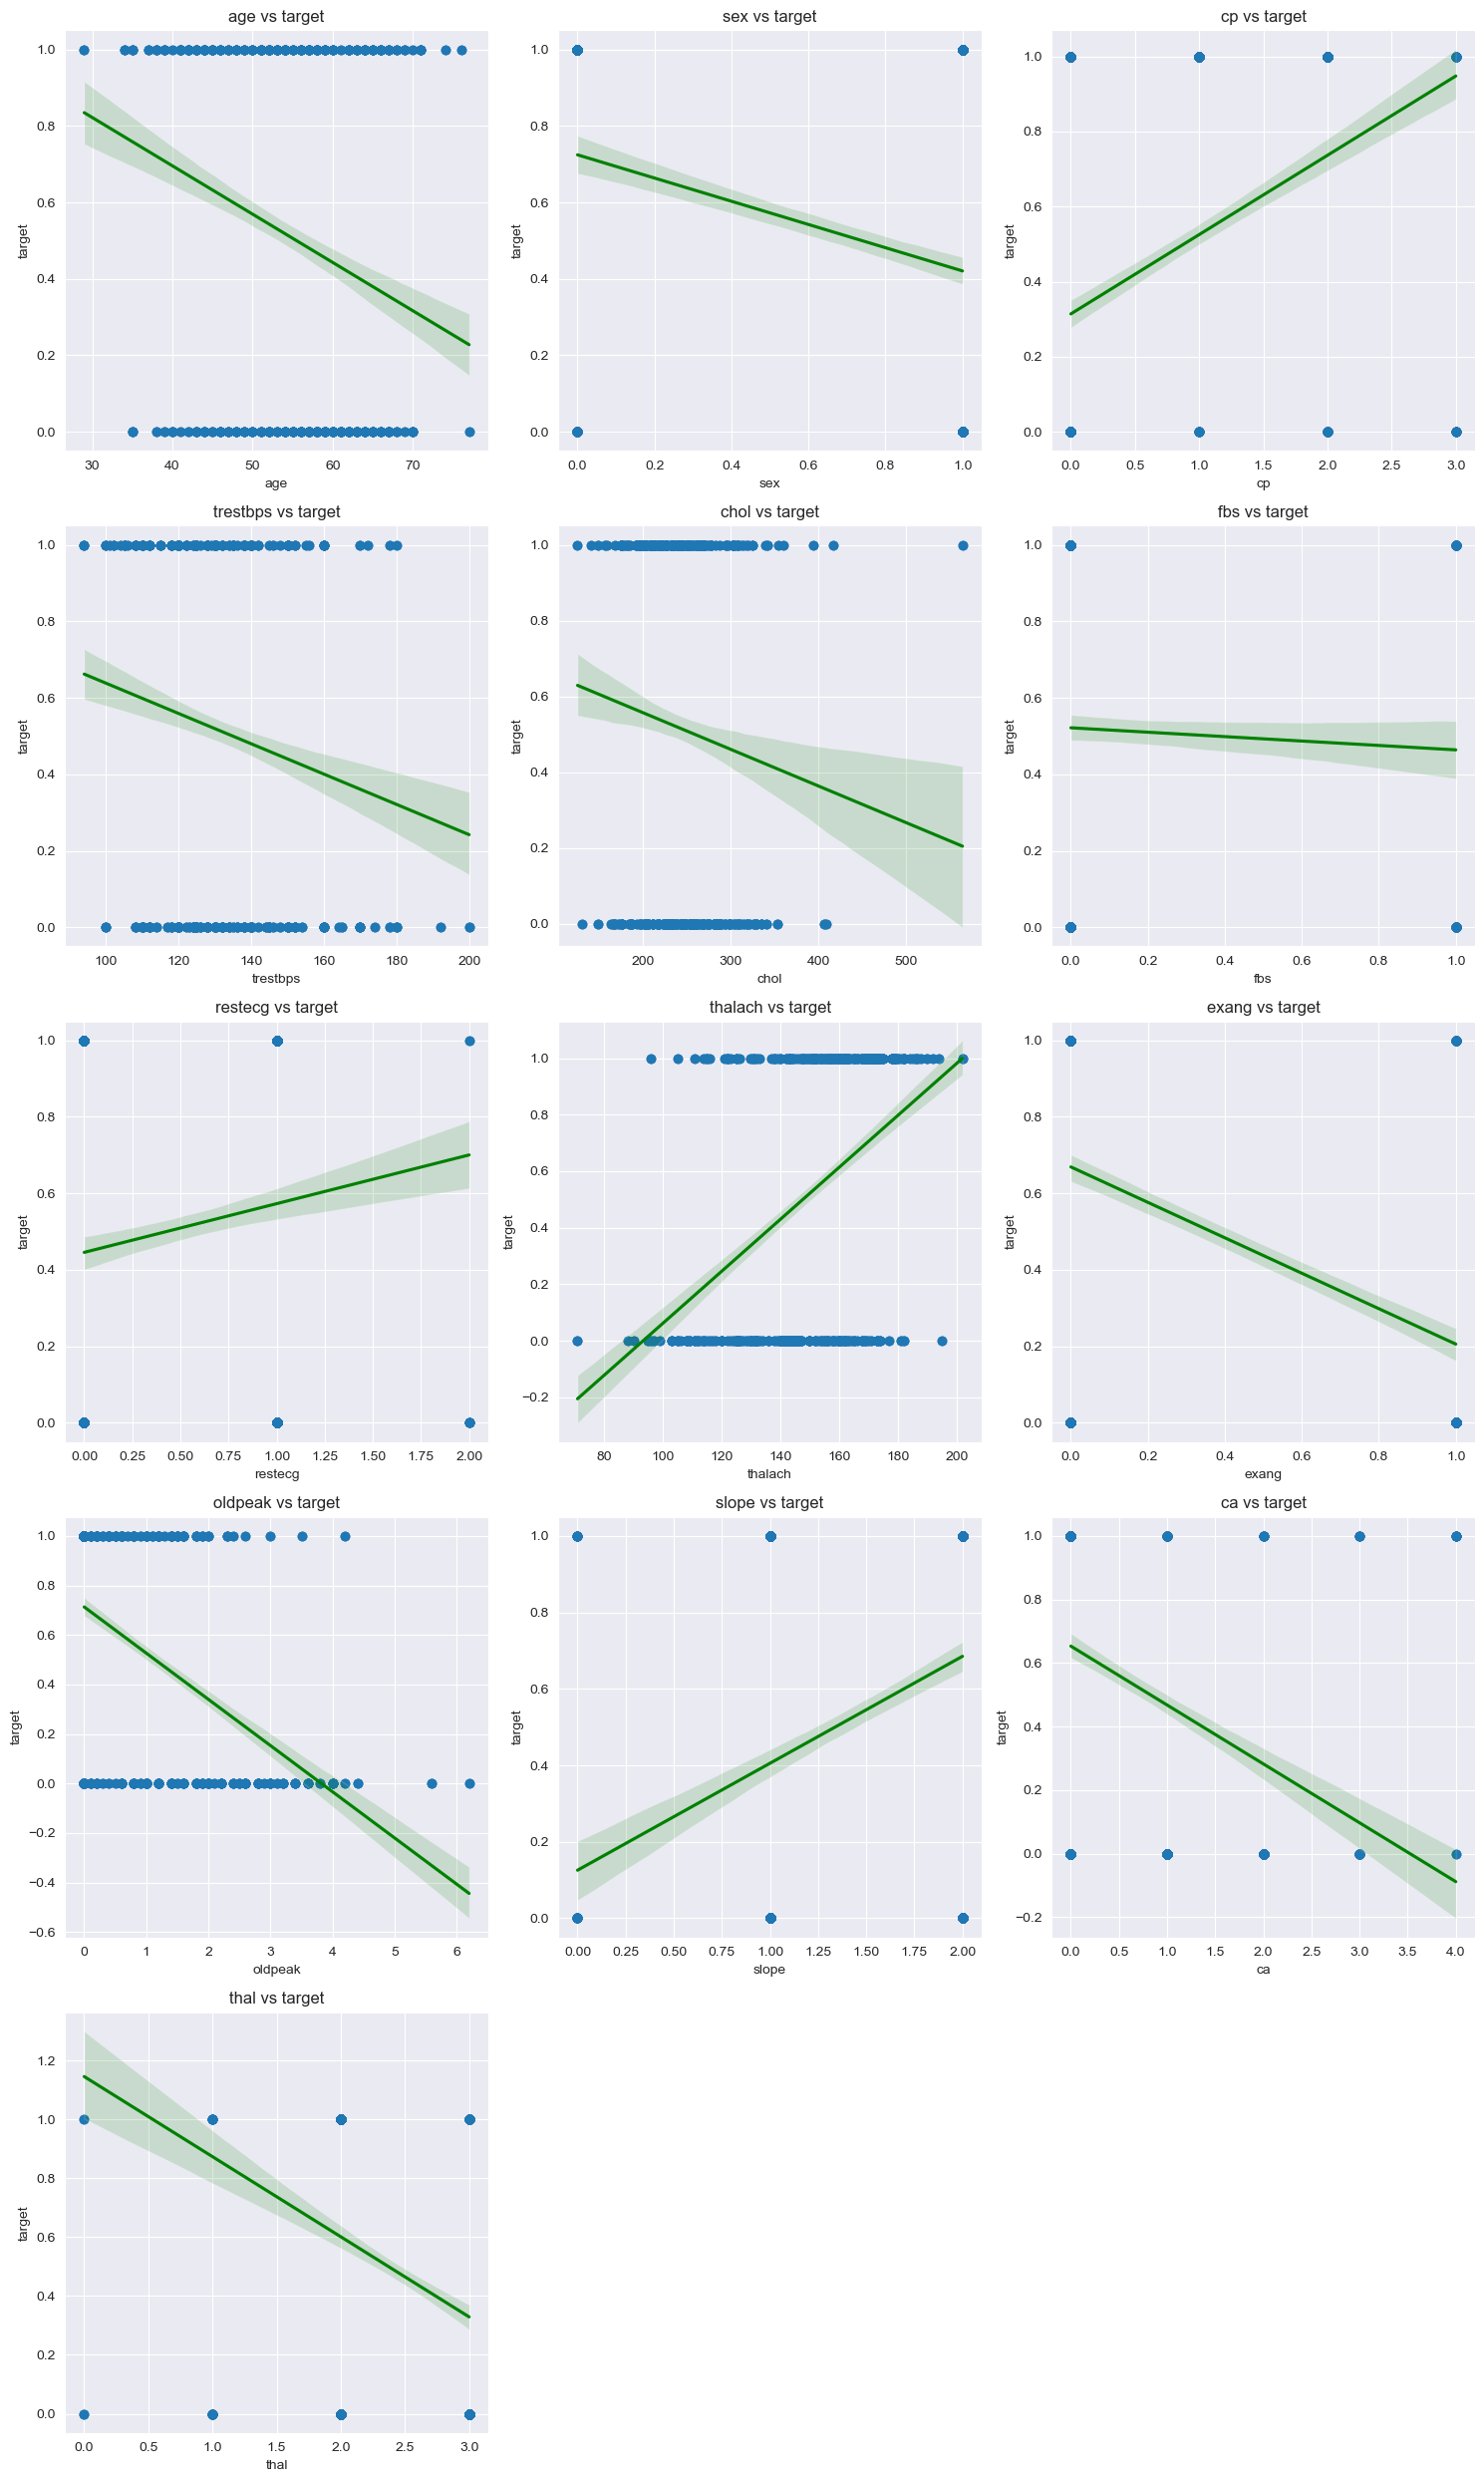

In [8]:
x_vars = ["age", "sex", "cp","trestbps", "chol", "fbs","restecg", "thalach", "exang","oldpeak", "slope", "ca","thal"]
y_var = "target"

num_cols = 3
num_rows = math.ceil(len(x_vars) / num_cols)

# Create a figure with custom size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Create pairplots for each group of variables and place them in the subplots
for i, x_var in enumerate(x_vars):
    row = i // num_cols
    col = i % num_cols
    
    sns.regplot(data=heart, x=x_var, y=y_var, ax=axes[row, col], line_kws={'color': 'green'})
    axes[row, col].set_title(f"{x_var} vs {y_var}")

# Remove any empty subplots
for i in range(len(x_vars), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing
plt.tight_layout()


plt.show()

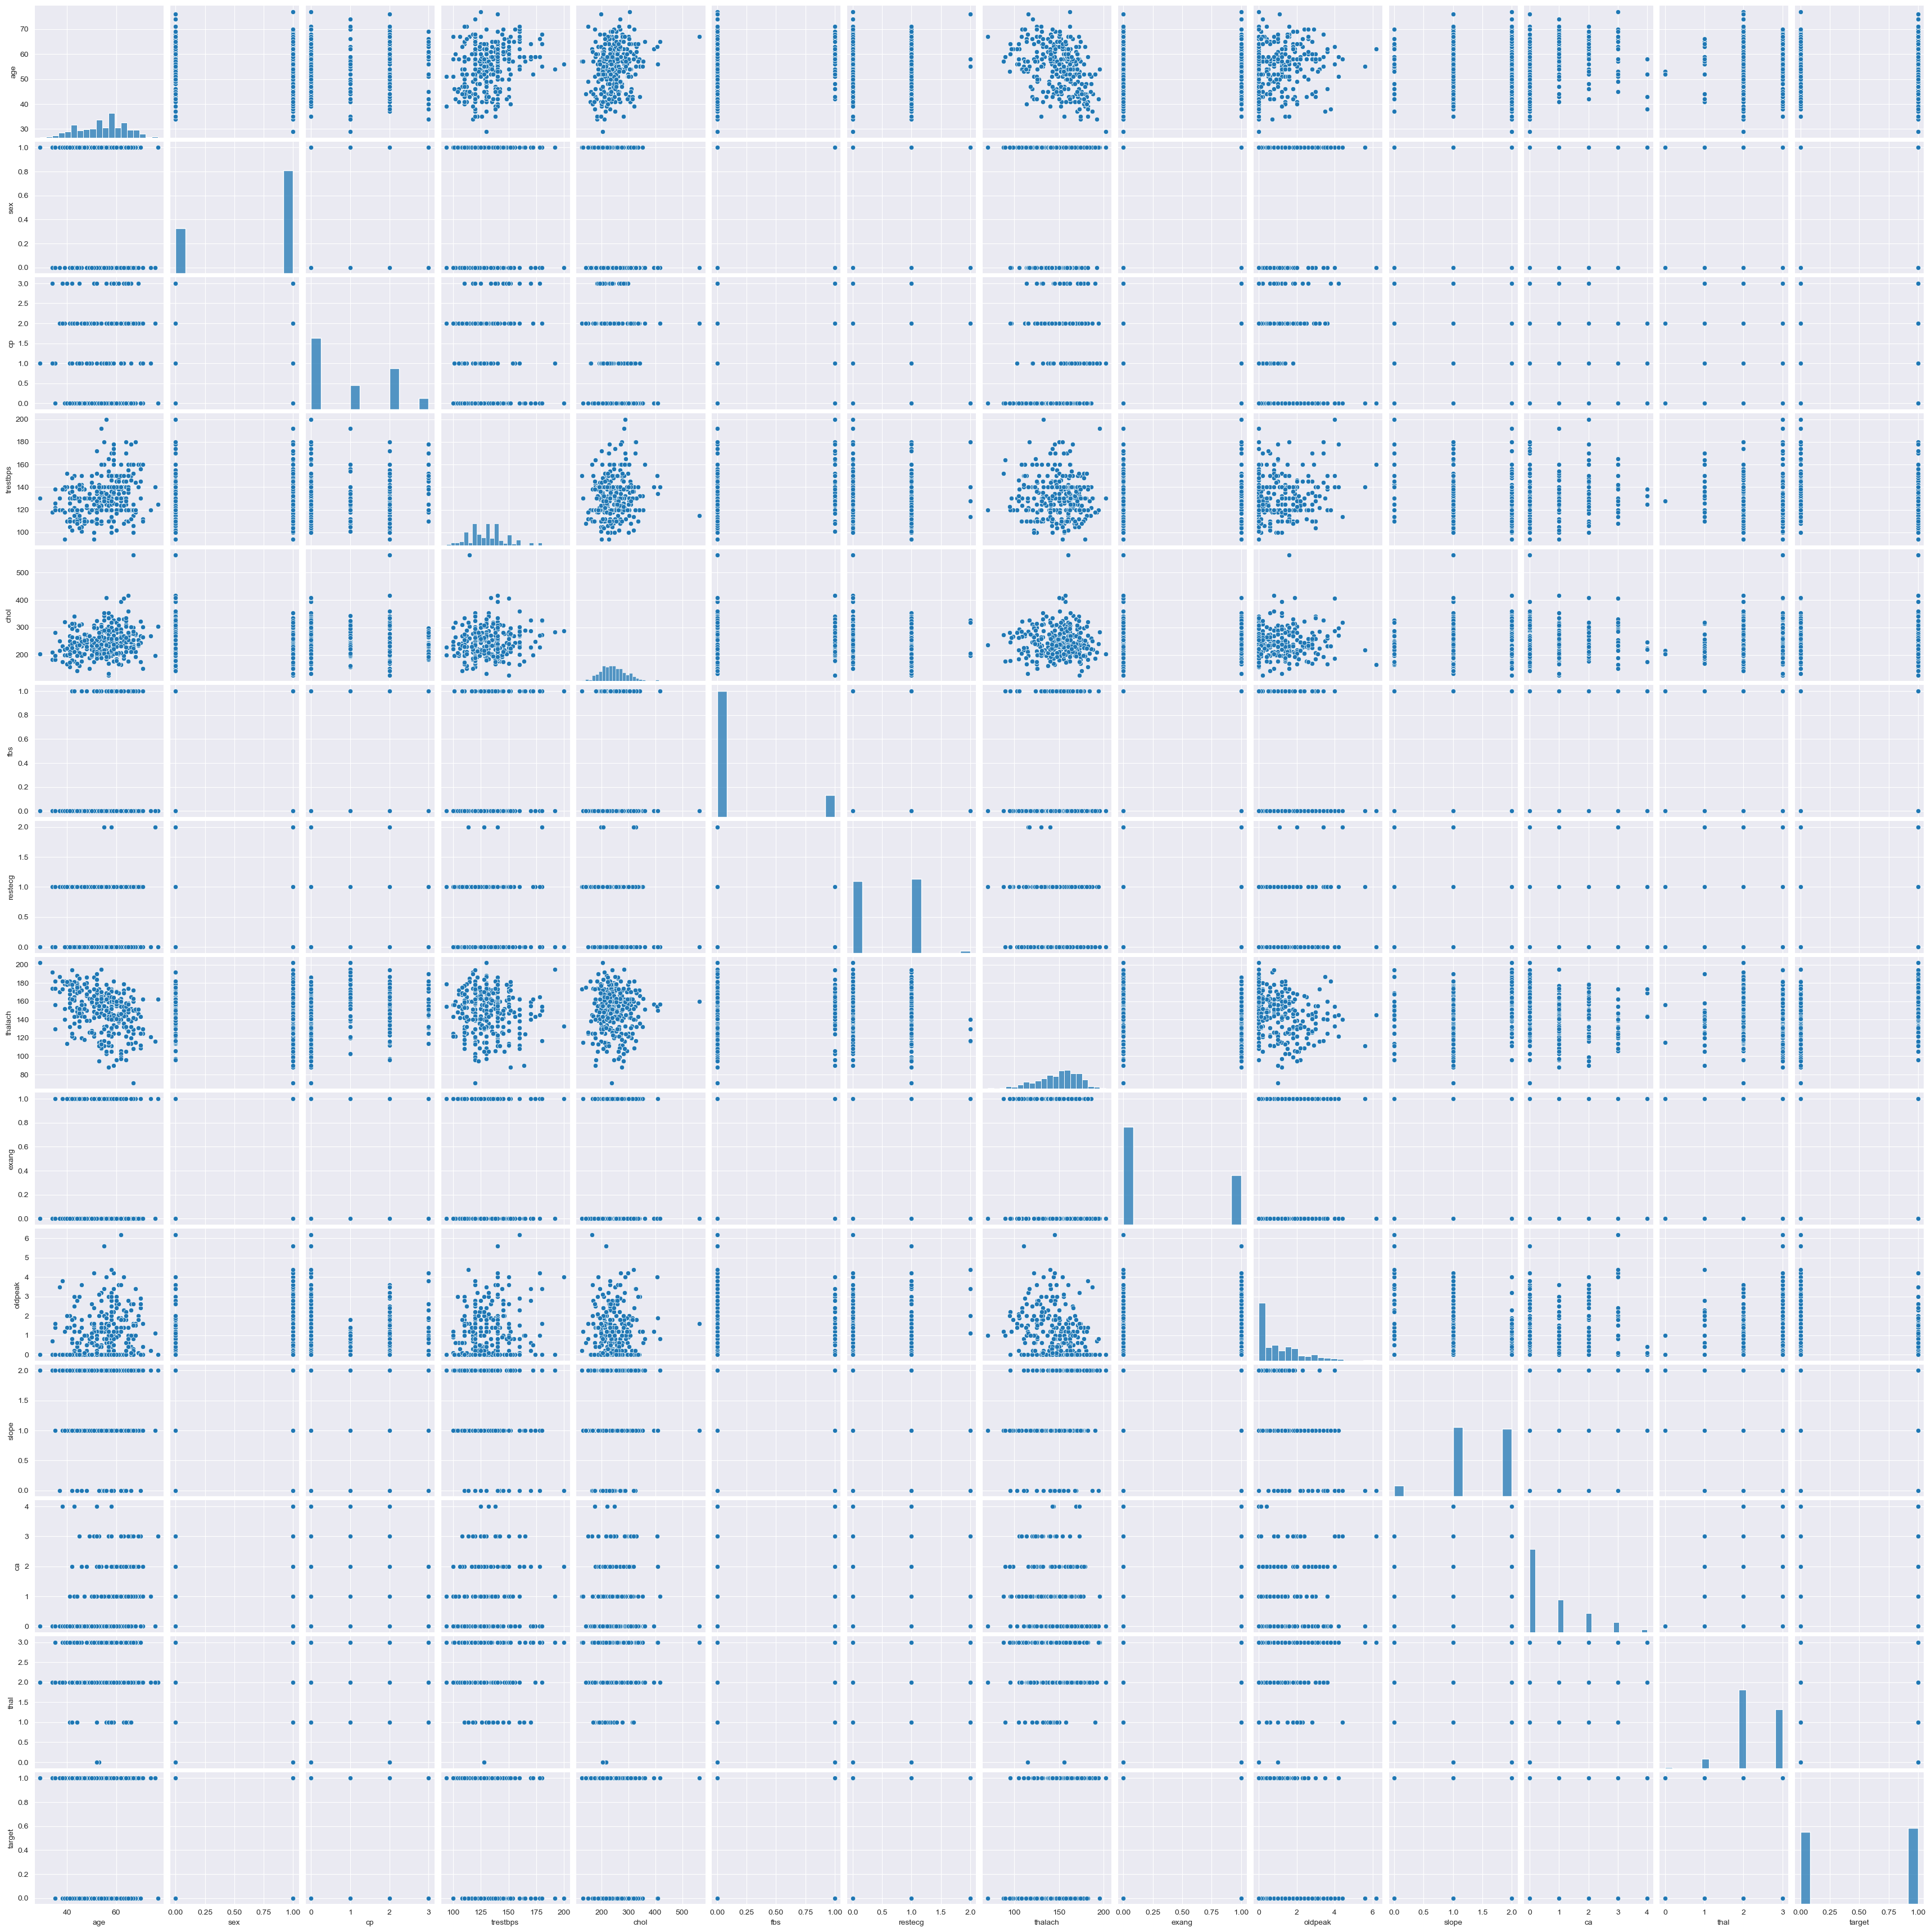

In [9]:
sns.pairplot(heart)

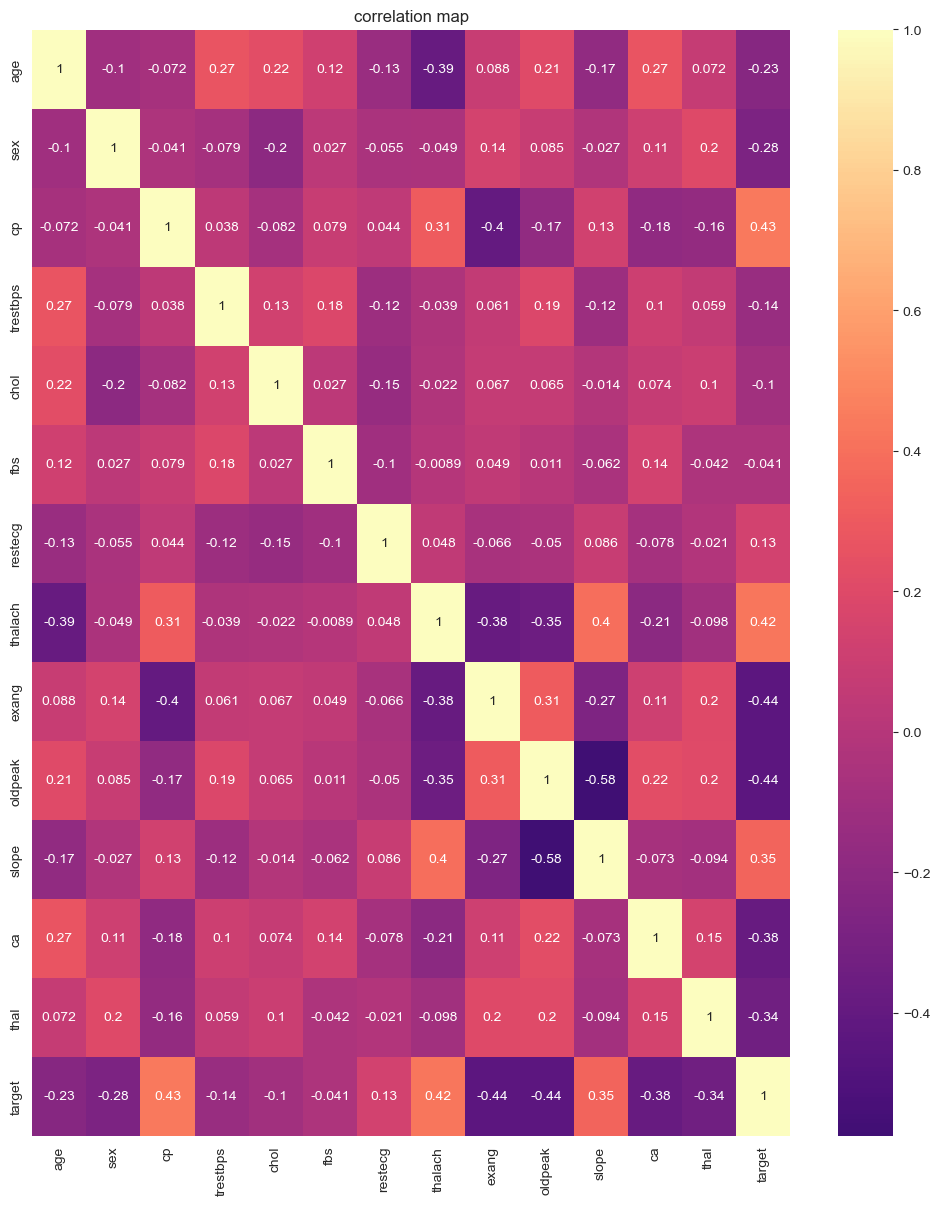

In [10]:
matrix=heart.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(matrix, annot=True, cmap='magma',center=0);
plt.tight_layout()
plt.title("correlation map")
plt.show()


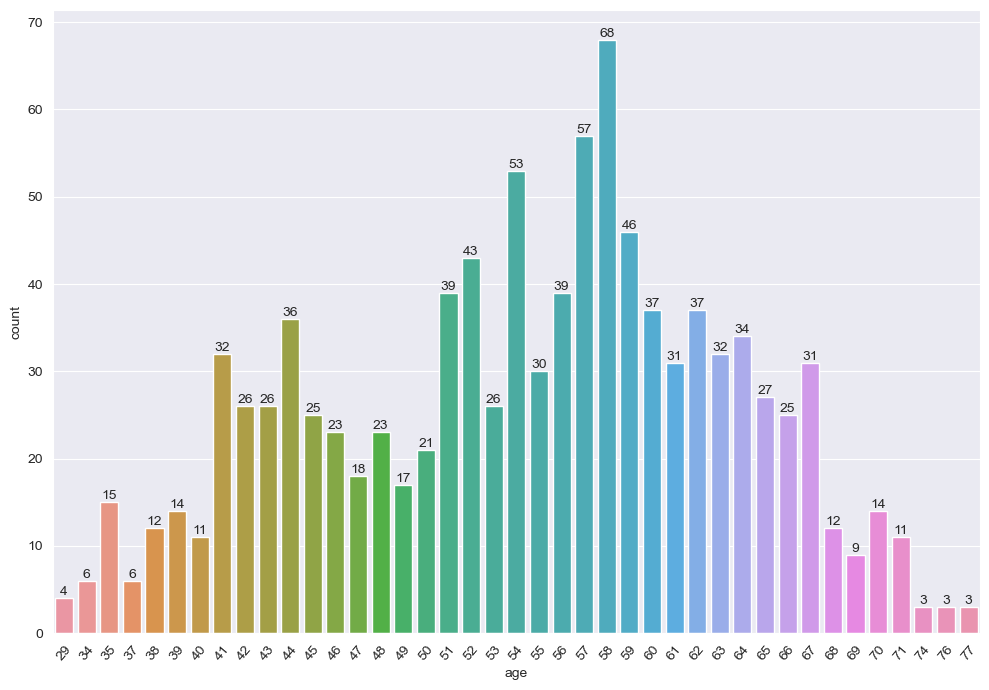

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.xticks(rotation=50)
bar = sns.countplot(data=heart, x='age')
for c in bar.containers:
    plt.bar_label(container=c, label_type='edge')
plt.tight_layout()

We get a countplot of the "age" column with rotated x-axis labels, and each bar  have a label showing the count of occurrences of that age value. 

In [12]:
age_bps = pd.DataFrame({
    'The average of the resting blood pressure amount' : heart.groupby('age')['trestbps'].mean(numeric_only=True),
    'Age' : sorted(heart['age'].unique())
})
px.bar(age_bps, 'Age', 'The average of the resting blood pressure amount', color='Age')

This code  creating a bar chart where each bar represents the average resting blood pressure for a specific age, and the bars are colored by age.

In [13]:
age_chol = pd.DataFrame({
    'The average of the cholestoral amount (mg/dl)' : heart.groupby('age')['chol'].mean(numeric_only=True),
    'Age' : sorted(heart['age'].unique())
})
px.bar(age_chol, 'Age', 'The average of the cholestoral amount (mg/dl)', color='Age')

The average cholesterol levels for different age groups, with bars colored by age.

In [14]:
age_nv = pd.DataFrame({
    'The number of major vessels' : heart.groupby('age')['ca'].count(),
    'Age' : sorted(heart['age'].unique())
})
px.bar(age_nv, 'Age', 'The number of major vessels', color='Age')

The number of major vessels for different age groups, with bars colored by age.

In [15]:
heartD_cp = pd.DataFrame({
    'The situation of clinets (0-1)' : heart.groupby('cp')['target'].mean(),
    'The chest pain type' : sorted(heart['cp'].unique())
})
px.histogram(heartD_cp, 'The chest pain type', 'The situation of clinets (0-1)',
             color='The chest pain type', barmode='overlay', nbins=4)

This histogram displaying the distribution of "The situation of clients (0-1)" for each chest pain type, with the histograms overlaid and colored by chest pain type.

In [16]:
heartD_maxRate = pd.DataFrame({
    'The situation of clinets (0-1)' : heart.groupby('thalach')['target'].mean(),
    'The maximum heart rate achieved' : sorted(heart['thalach'].unique())
})
px.bar(heartD_maxRate, 'The maximum heart rate achieved', 'The situation of clinets (0-1)',
             color='The maximum heart rate achieved')

This bar chart display the relationship between the maximum heart rate achieved and the situation of clients, with bars colored by the maximum heart rate achieved.

In [17]:
heartD_slope = pd.DataFrame({
    'The situation of clinets (0-1)' : heart.groupby('slope')['target'].mean(),
    'The slope of the peak exercise' : sorted(heart['slope'].unique())
})
px.histogram(heartD_slope, 'The slope of the peak exercise', 'The situation of clinets (0-1)',
             color='The slope of the peak exercise', nbins=3)

A histogram displaying the distribution of "The situation of clients (0-1)" for each slope of the peak exercise, with the histogram bars colored by the slope of the peak exercise.

1    526
0    499
Name: target, dtype: int64


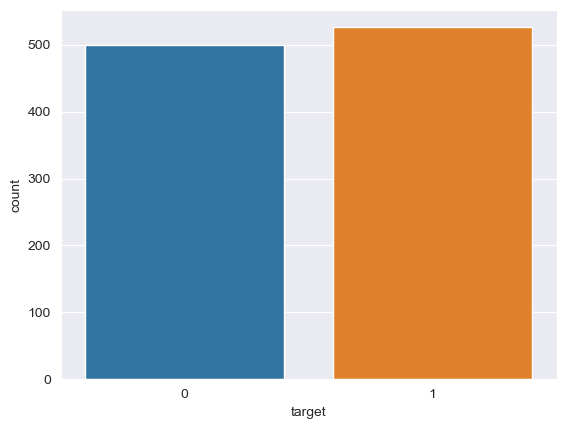

In [45]:
sns.countplot(data=heart, x='target')
target_temp = heart.target.value_counts()

print(target_temp)

In [46]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Dropping Unnecessary Variables 🔻 </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The variables that unnecessary will be deleted.
</div>

In [19]:
# --- Drop Unnecessary Variables ---
df = heart.drop(columns = ['cp', 'thal', 'slope'])

In [20]:
# --- Display New Data Frame ---
heart.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


## Step 3: Data Scaling

In [21]:
# checking the distribution of Target Variable
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Splitting the Features and Target 🪓</div>
It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data.

One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive.

After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [22]:
X = heart.drop(columns='target', axis=1)
Y = heart['target']

In [23]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [24]:
#Splitting Data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


## Model Training & Evaluation
## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">Logistic regression</div>

In [26]:
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, Y_train) # Training

LogisticRegression(random_state=0)

In [27]:
from sklearn.metrics import accuracy_score, classification_report
# accuracy on training data
X_train_prediction1 = logistic_reg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction1, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [28]:
#acuracy on test data
X_test_prediction1=logistic_reg.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction1,Y_test)
print('Accuracy on Test data :',test_data_accuracy)

Accuracy on Test data : 0.8048780487804879


In [29]:
param_grid = {
    'C': [0.1, 1.0,2.0,5.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
}

In [30]:
grid_model = GridSearchCV(estimator=logistic_reg , param_grid=param_grid, cv=10)

In [31]:
def report_model(model):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred)).plot()
    plt.show()
    
    # Calculate the probabilities for each class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if len(model.classes_) == 2:
            # For binary classification, consider only the positive class probability
            y_prob = y_prob[:, 1]
        else:
            # For multi-class classification, use one-vs-rest strategy and calculate ROC for each class
            y_prob = y_prob[np.arange(len(y_prob)), Y_test]
    else:
        raise AttributeError("Model does not have a 'predict_proba' method.")
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
    
    # Calculate the AUC (Area Under the Curve)
    auc_score = roc_auc_score(Y_test, y_prob)
    
    # Plot the ROC curve
    plt.figure()
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name=type(model).__name__).plot()
    plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       100
           1       0.77      0.87      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205

Confusion Matrix:


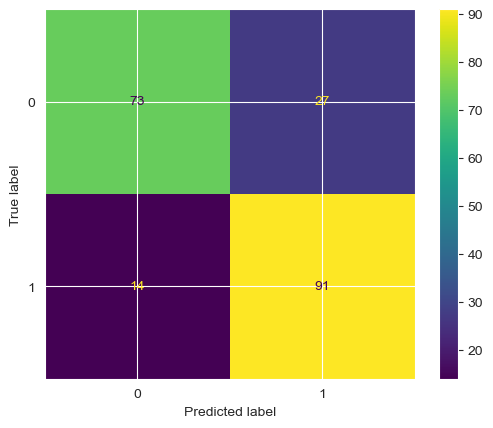

<Figure size 640x480 with 0 Axes>

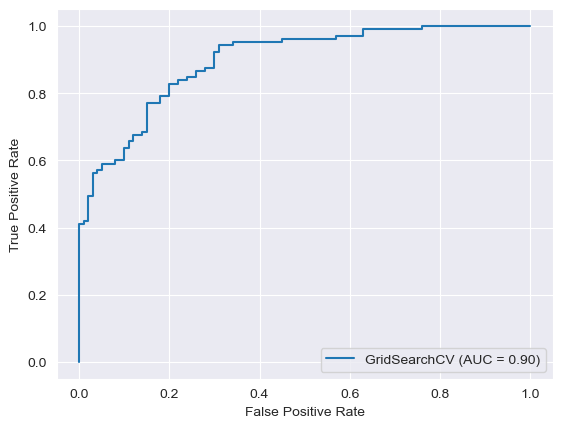

In [32]:
report_model(grid_model)

In [33]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'liblinear'}

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Naive Bayes</div>
Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.

In [34]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, Y_train)
y_pred_GNB = GNBclassifier.predict(X_test)

In [35]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, Y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

.:. Gaussian Naive Bayes Accuracy: 69.27% .:.


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">KNN</div>
K value defines how many neighbors will be checked to determine the classification of a specific query point. For example, if k=1, the instance will be assigned to the same class as its single nearest neighbor.

In [36]:
# selecting a random k value
k=4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train ,Y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [37]:
y_hat = knn.predict(X_test)
y_hat[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set

In [38]:
print ('Train dataset accuracy: ', metrics.accuracy_score(Y_train , knn.predict(X_train)))
print ('Test dataset accuracy: ', metrics.accuracy_score(Y_test , knn.predict(X_test)))  

Train dataset accuracy:  0.9365853658536586
Test dataset accuracy:  0.7951219512195122


Let us use 10 different K values from 1-10 to see which K value gives best accuracy for the data.

In [39]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.96585366, 0.93658537, 0.79512195, 0.72195122,
       0.76097561, 0.68780488, 0.66829268, 0.70243902])

The mean accuracy along with the K values to understand the relation better.

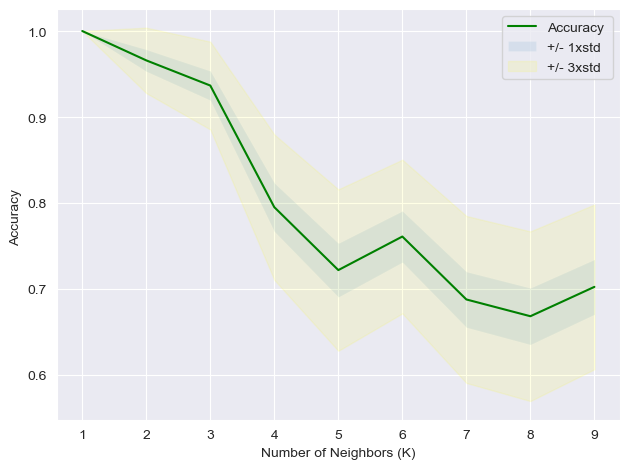

In [40]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

We can see that if our K value is less than 3, we get an accuracy of more than 95%, but if we move to 4 the accuracy significantly drops to 85%. So the ideal choice would a K value of eeither 2 or 3.

<div style='font-size:200%;'>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center>  Thank you ! </center>
    </h3>
</div>